## Fetching Dataset

In [124]:
from keras.datasets import mnist
import numpy as np

In [125]:
# Always shuffle data 

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()# MNIST_784 is the name of the MNIST dataset

# Here it will shuffle the data by the index value 
shuffle_index = np.random.permutation(60000)
train_X, train_Y  = train_X[shuffle_index], train_Y[shuffle_index]

In [126]:
# test_X

In [127]:
# It convertst the data from 3d to 2d
train_X = train_X.reshape((60000, 28*28))
test_X = test_X.reshape((10000, 28*28))

In [128]:
#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [129]:
# With this backend, the output of plotting commands is displayed inline within frontends like
# the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline 

In [130]:
import matplotlib
import matplotlib.pyplot as plt


In [131]:
some_digit = train_X[36125] # index no of the image in the databae
some_digit_image = some_digit.reshape(28, 28)
 # Reshape the data to plot it
# The data is not in the form of images because for compactness of data.
some_digit.shape
some_digit_image.shape
# some_digit

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

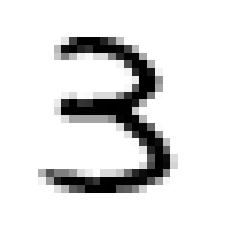

In [132]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest') # interpolate - insert (something of a different nature) into something else.
#  What is interpolation near?
# interpolation='nearest' simply displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution (which is most often the case). It will result an image in which pixels are displayed as a square of multiple pixels.
plt.axis('off')

## Creating a 2 detector

In [133]:
# First convert the the values from string to int
train_Y_2 = train_Y.astype(np.int8)
test_Y_2 = test_Y.astype(np.int8)
train_Y_2 = (train_Y == 2)
test_Y_2 = (test_Y == 2)

In [155]:
train_Y_2
# train_X
# test_Y_2

array([False, False, False, ..., False, False,  True])

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
# You can add the tolerance in the Logistic Regression like 0.1 for the faster execution
# clf= LogisticRegression(tol = 0.1)
clf= LogisticRegression(solver='lbfgs')

In [137]:
clf.fit(train_X, train_Y_2)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
clf.predict([some_digit])

array([False])

## Cross Validation
In the cv= 3 means first it will train on 2, 3 set and test on set 1 and so on

In [139]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, train_X, train_Y_2, cv=3, scoring='accuracy')

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [140]:
a.mean()

0.9781999999999998

For classifiers accuracy is not a good mehtod to say whetther the model is good or not because it may happen that classes that you want the results will be in very less numbers for eg : In mnist 2 is in very less numbers.

In [141]:
from sklearn.model_selection import cross_val_predict
train_Y_2_pred = cross_val_predict(clf, train_X, train_Y_2, cv=3)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [142]:
train_Y_2_pred

array([False, False, False, ..., False, False,  True])

## Calculating confusion matrix

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
confusion_matrix(train_Y_2, train_Y_2_pred) # This is the confusion matrix for perfect predictions

array([[53554,   488],
       [  820,  5138]], dtype=int64)

## Precision and Recall

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
precision_score(train_Y_2, train_Y_2_pred) # This is a precision score

0.9132598649129043

In [147]:
recall_score(train_Y_2, train_Y_2_pred) # This is a recall score

0.8623699227928835

## Calculating F1 score

In [148]:
from sklearn.metrics import f1_score

In [149]:
f1_score(train_Y_2, train_Y_2_pred)

0.887085635359116

### To save the joblib file

In [150]:
from joblib import dump, load
dump(clf, 'MNIST_project.joblib')

['MNIST_project.joblib']

## Precision Recall curve

In [152]:
from sklearn.metrics import precision_recall_curve

In [163]:
y_scores = cross_val_predict(clf, train_X, train_Y_2, cv=3, method='decision_function')
# Here we are finding out the decision functions

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [162]:
y_scores 

array([-19.16398385, -10.51146129,  -3.74573399, ...,  -8.73341872,
        -6.863648  ,   1.16140538])

In [171]:
precisions, recalls, thresholds = precision_recall_curve(train_Y_2, y_scores)

In [172]:
precisions

array([0.10026083, 0.10024569, 0.10024738, ..., 1.        , 1.        ,
       1.        ])

In [173]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [174]:
thresholds

array([-26.89488709, -26.87355435, -26.87291811, ...,  17.27422137,
        18.10109509,  19.21960107])

## Plotting the Precision Recall Curve

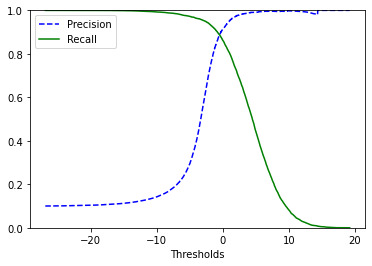

In [177]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

In [151]:
from joblib import dump, load
import numpy as np
model = load('MNIST_project.joblib')
features = np.array(train_X)
# features
model.predict(features)

array([False, False, False, ..., False, False,  True])